# classic segmentation

<div class="custom-button-row">
    <a 
        class="custom-button custom-download-button" href="../../notebooks/4_python_basics/Intro_to_Python_II.ipynb" download>
        <i class="fas fa-download"></i> Download this Notebook
    </a>
    <a
    class="custom-button custom-download-button" href="https://colab.research.google.com/github/HMS-IAC/bobiac/blob/gh-pages/colab_notebooks/4_python_basics/Intro_to_Python_II.ipynb" target="_blank">
        <img class="button-icon" src="../../_static/logo/icon-google-colab.svg" alt="Open in Colab">
        Open in Colab
    </a>
</div>

In [1]:
# /// script
# requires-python = ">=3.10"
# ///

# Standard library imports (no need to declare in dependencies)

## Boston Bioimage Analysis Course

Welcome to your next step in learning image processing with Python!  
This notebook is written **like a small interactive book** to complement the lecture.

This notebook covers the following **core building blocks**:

| Chapter | Concept | Why it matters |
|---------|---------|----------------|
| 0 | [Setup](#0-setup) | Import necessary packages |
| 1 | [Loading an Image](#1-data-types) | Learn how to open tif images and display them |
| 2 | [Thresholding](#2-variables) | Learn how to use thresholding to generate a binary mask |
| 3 | [Filtering](#3-operators) | Learn how to process images to improve thresholding results |
| 4 | [Mask Curation](#4-data-structures) | Learn how to use watershed segmentation to refine binary masks |
| 5 | [Mask Labeling](#5-data-structures-lists) | Learn how to label a binary mask |

Each chapter has:

1. **Narrative explanation** – read this like a textbook.
2. **Live demo** – run and play.
3. **Exercise** – _your turn_ & _guess the output!_ ✅ 

***

## <p class="alert alert-success">0. Setup</p>

**Concept.**  
We are going to be using existing Python packages for classic segmentation, so we need to tell `uv` what they are. This is called specifying our **dependencies**.

Eva check with F/M/T how we want to handle this stuff. 

### Dependencies with uv
How much redundancy should be here...

***

## <p class="alert alert-success">1. Loading an Image</p>

**Concept.**
To work with an image in Python, we need to specify where the image file is so that we can **read**, or load, it. Once the image file is read, we can **view** it.  

### File paths
A file's **path** is the location of where a file is located on your computer. They tend to be structured as a path of consecutive folder names that ends with your file name. In Python, we specify paths as `str` types. They tend to be structured as follows: 
```python
# file path on a mac
'/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/img.tif'

# file path on a pc
'\D:\Eva_CITE_folder\projects\bobiac\lectures\classic_segmentation\img.tif'

```
Yes, on unix-based operating systems like MacOS X, each step to get to your file is separated by a `/`. However on Windows systems, each step to get to your file is separated by a `\`. Luckily, Python is very smart and has a way to overlook this difference by adding an `r` at the beginning of the directory right before the `str`:
```python
# file path on a pc
r'\D:\Eva_CITE_folder\projects\bobiac\lectures\classic_segmentation\img.tif'
```

### Finding your file's path
There are many ways to find your file's path. Here's one way that works regardless of your operating system: 
1. Find your file. 
2. Open up terminal (macOS X) or Command Prompt (Windows), and drag the file into the window. 
3. What displays after is the file's path! You can copy and paste it into your code as a `str`. 

**❗️CAUTION❗️** Be wary of spaces in folder names, as they sometimes cause terminal to add `\` or `/` to file directories where they should not be. It is best practice to always use `_` in folder names whenever you would have wanted to have a space.

**🗒️ NOTE:** Specifying file paths is a common task outside of image segmentation with Python, so some of you may have experience with this already. Note the terminology though. An individual file's location is a **path**. A folder's path containing an individual or multiple files is called a **directory**.

### Specifying your file's path
Once you have found your file's path, you should assign it to a variable to make it easy to work with. Here's an example:
```python
file_path = '/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/img.tif'
```
Now you give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Specify a file's path</strong>
</div>

Find your file's path, then assign it to the variable `image_path`. 

In [1]:
image_path = "/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/DAPI_wf_0.tif"

### Reading an image
There are many different ways to read image files in Python. In this lesson, we are using the Python package `tifffile`, to read .tif image files. In order to read an image with `tifffile`, you will need to import it and provide it with the image's path. We can do that as follows: 
```python
import tifffile
tifffile.imread(image_path)
```
`tifffile.imread()` will use that `image_path` you inputted to find your file and read it. It will then return the read file. Since we will be wanting to work with this file, we should assign the output to a variable for easy reference: 
```python
raw_image = tifffile.imread(image_path)
```

Now you give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Load the image with tifffile</strong>
</div>

Use tifffile to read your file and assign it to the variable `raw_image`.

In [2]:
import tifffile

raw_image = tifffile.imread(image_path)

### Viewing the image
In Python, reading the image and viewing it are two separate actions. Now that we have read the image and assigned it to the variable `raw_image`, we can display, or view, it using `matplotlib.pyplot`, which we can import as `plt` for conciseness. We can do this as follows: 
```python
import matplotlib.pyplot as plt
plt.imshow(raw_image)
```
`plt.imshow()` will use that `raw_image` you inputted to plot your image. It will then return the plot to view. 

<div class="alert alert-info">
  <strong> 📓 ACTION: View the image with matplotlib</strong>
</div>

Use `matplotlib.pyplot` to view `raw_image`.

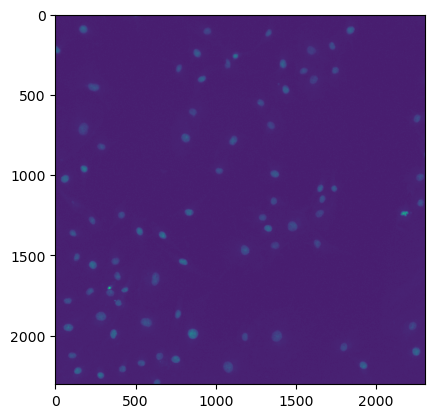

In [3]:
import matplotlib.pyplot as plt

plt.imshow(raw_image)

***

## <p class="alert alert-success">2. Thresholding</p>

**Concept.**  
**Thresholding** is when we select a range of digital values, or **intensity values**, in the image. These selected values are how we define regions of the image we are interested in. 

### Displaying an image's histogram
Since thresholding is based on intensity values, it will be helpful to get a sense of what our image's intensity values are! A histogram is a very helpful graph to visualize distributions of values, including intensity values! We can use `matplotlib`, which we imported as `plt`, to generate a histogram of our image as follows:
```python
plt.histogram(raw_image)
```
Here, `plt.histogram()` will use that `raw_image` you inputted to plot the distribution of its intensity values. It will then return the plot to view.

<div class="alert alert-info">
  <strong> 📓 ACTION: Display an image's histogram</strong>
</div>

Use `plt` to make a histogram plot of `raw_image` intensity values. 

In [7]:
from skimage.exposure import histogram

hist, hist_centers = histogram(raw_image)
plt.plot(hist)
plt.show()

ModuleNotFoundError: No module named 'skimage'

### Defining a threshold
Now that we can view our image's distribution of intensity values, let's define a minimum intensity cutoff which separates the **background** (what we don't care about) from the **foreground** (what we do care about). Using the histogram, we can use the left-most bin as a starting point for a cutoff value. For easy reference, assign this value to a variable `min_threshold`: 

```python
min_threshold = 50
```
Now you give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Define a threshold</strong>
</div>

Declare a `min_threshold` variable with an intensity value cut off. 

In [ ]:
min_threshold = 50

### Generating a binary mask
We now want to use this cutoff value to generate a **binary mask**, which is an image that has 0 values where there is background and 1 values where there is foreground. By generating the binary mask, we will be able to evaluate whether this `min_threshold` is a sufficient cutoff value. 

We can generate the binary mask by using the comparison operator `>`:
```python
raw_image > min_threshold
```
Python will interpret this line of code by going pixel by pixel through `raw_image` and assigning 1 values where a pixel is greater than `min_threshold` and assigning 0 values where a pixel is equal or less than `min_threshold`. The output will be the binary mask image, filled with 1s and 0s. Since this binary mask is something we will be working with, we should assign it a variable. 

Now you give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Generate a binary mask</strong>
</div>

Make a binary mask out of `raw_image` using the `min_threshold` variable and assign it to the variable `binary_mask`. Then, use `plt.imshow()` to display it.

In [ ]:
binary_mask = raw_image > min_threshold
plt.imshow(binary_mask)

### Thresholding Algorithms
We can manually change the value assigned to `min_threshold` until we find an optimal intensity cutoff value, but this is tedious and may vary between images in a dataset. Therefore, it is best practice to instead use established thresholding algorithms to automatically define an intensity cutoff value. `skimage.filters` contains many different types of thresholding algorithms, but from that we will be using the Otsu thresholding algorithm `threshold_otsu`. We can do that as follows: 
```python
from skimage.filters import threshold_otsu
threshold_otsu(raw_image)
```
Here, `threshold_otsu()` will use that inputted `raw_image` to calculate an intensity cutoff value. It will return the value. Therefore, we can use it to generate a binary mask: 
```python
binary_mask = raw_image > threshold_otsu(raw_image)
```

Now you give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Using thresholding algorithms to generate a binary mask</strong>
</div>

Make a binary mask using `threshold_otsu` from `skimage.filters`, then use `plt.imshow()` to display it.

In [ ]:
from skimage.filters import threshold_otsu

binary_mask = raw_image > threshold_otsu(raw_image)
plt.imshow(binary_mask)

### Evaluating the binary mask
We can evaluate the binary mask by comparing it to the raw image. In particular, we are looking to see whether the white regions (pixel value 1) of the binary mask correspond perfectly to the regions of interest in the raw image. To do this, we can use matplotlib to plot `raw_image` and `binary_mask` side by side. Here's how we structure the code: 
```python
# Create a figure and axis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# Plot the 2 images
# raw_image
axes[0].imshow(raw_image, cmap='gray', vmin=raw_image.min(), vmax=raw_image.max()) # plot the raw_image
axes[0].set_title("Raw Image", fontweight='bold') # label the raw_image
axes[0].axis('off')  # Turn off axis

# binary_mask
axes[1].imshow(binary_mask, cmap='gray', vmin=binary_mask.min(), vmax=binary_mask.max()) # plot the binary_mask
axes[1].set_title("Binary Mask", fontweight='bold') # label the binary_mask
axes[1].axis('off')  # Turn off axis

# Show the plot
plt.show()

```
Viewing images side by side to evaluate processing steps is going to be a frequent action of this lesson. Therefore, let's bundle this code structure into a function! 

- E needs to check in with Maria because they will have written a function do this already in the previous lesson

<div class="alert alert-info">
  <strong> 📓 ACTION: Display raw_img and binary_mask</strong>
</div>

Use `plt` to plot `raw_image` and `binary_mask` images.

In [ ]:
# Create a figure and axis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# Plot the 2 images
# raw_image
axes[0].imshow(
    raw_image, cmap="gray", vmin=raw_image.min(), vmax=raw_image.max()
)  # plot the raw_image
axes[0].set_title("Raw Image", fontweight="bold")  # label the raw_image
axes[0].axis("off")  # Turn off axis

# binary_mask
axes[1].imshow(
    binary_mask, cmap="gray", vmin=binary_mask.min(), vmax=binary_mask.max()
)  # plot the binary_mask
axes[1].set_title("Binary Mask", fontweight="bold")  # label the binary_mask
axes[1].axis("off")  # Turn off axis

# Show the plot
plt.show()

***

## <p class="alert alert-success">3. Filtering</p>

**Concept.**  
**Filters** change image pixel values using a **specific mathematical operation** to smooth and reduce noise from images. They can help improve thresholding results. 

### Applying a filter to an image
There are many different filters we can apply. Here's a summary of common ones: 
| Filter Name | Description | How to import it | Documentation Link | 
|---------|---------|----------------| ----------------|
| mean filter | For a given kernel size, sums values in a list and and then divides by the total number of values | `from skimage.filters.rank import mean` | [skimage.filters.rank.mean](https://scikit-image.org/docs/0.25.x/api/skimage.filters.rank.html#skimage.filters.rank.mean) |
| Gaussian blur filter | For a given kernel size, multiply each value by a Gaussian profile weighting, then divide by the total number of values | `from skimage.filters import gaussian` | [skimmage.filters.gaussian](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian) |
| median filter | For a given kernel size, take the middle number in a sorted list of numbers | `from skimage.filters import median` | [skimage.filters.median](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median) |


For today, let's use the median filter `median` from `skimage.filters`. We can apply this filter to our `raw_image` as follows: 
```python
from skimage.filters import median
median(raw_image)
```
Here, `median()` will use that inputted `raw_image` to go pixel by pixel to apply a 3x3 kernel by default. It will return the filtered image, so we should assign it a variable!
```python
from skimage.filters import median
filtered_image = median(raw_image)
```

Now you give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Apply a median filter to raw_image</strong>
</div>

From `skimage.filters`, use `median()` to apply a median filter to `raw_image`. 

In [ ]:
from skimage.filters import median

filtered_image = median(raw_image)

### Use the filtered image to define a threshold and generate a binary mask
Now, we can go through the same steps of applying Otsu thresholding to `filtered_image` and then generating a binary mask. Go ahead and give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Generate a binary mask with the filtered image</strong>
</div>

Use Otsu thresholding to threshold `filtered_image` and generate a binary mask. Assign that binary mask to the variable `filtered_binary_mask`. Then display `filtered_binary_mask` with `plt.imshow()`.

In [ ]:
filtered_binary_mask = filtered_image > threshold_otsu(filtered_image)
plt.imshow(filtered_binary_mask)

### Evaluating the filtered binary mask
We can evaluate the effect on filtering `raw_image` before generating a binary mask by comparing `binary_mask` to `filtered_binary_mask`. Again, we are looking to see whether the white regions (pixel value 1) of `filtered_binary_mask` correspond to the regions of interest in the raw image *better* than `binary_mask` white regions. To do this, we can use `plt` to plot `raw_image`, `binary_mask`, and `filtered_binary_mask` side by side. Here's how we structure the code: 
```python
# Create a figure and axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot the 3 images
#raw_image
axes[0].imshow(raw_image, cmap='gray', vmin=raw_image.min(), vmax=raw_image.max()) # plot the raw_image
axes[0].set_title("Raw Image", fontweight='bold') # label the raw_image
axes[0].axis('off')  # Turn off axis

# binary_mask (using raw_image)
axes[1].imshow(binary_mask, cmap='gray', vmin=binary_mask.min(), vmax=binary_mask.max()) # plot the binary_mask
axes[1].set_title("Unfiltered Binary Mask", fontweight='bold') # label the binary_mask
axes[1].axis('off')  # Turn off axis

# filtered_binary_mask (using filtered_image)
axes[2].imshow(filtered_binary_mask, cmap='gray', vmin=filtered_binary_mask.min(), vmax=filtered_binary_mask.max()) # plot the filtered_binary_mask
axes[2].set_title("Filtered Binary Mask", fontweight='bold') # label the filtered_binary_mask
axes[2].axis('off')  # Turn off axis

# Show the plot
plt.show()
```

<div class="alert alert-info">
  <strong> 📓 ACTION: Compare the filtered and unfiltered binary masks</strong>
</div>

Use `plt` to display `raw_image`, `binary_mask`, and `filtered_binary_mask` side by side.

In [ ]:
# Create a figure and axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot the 3 images
# raw_image
axes[0].imshow(
    raw_image, cmap="gray", vmin=raw_image.min(), vmax=raw_image.max()
)  # plot the raw_image
axes[0].set_title("Raw Image", fontweight="bold")  # label the raw_image
axes[0].axis("off")  # Turn off axis

# binary_mask (using raw_image)
axes[1].imshow(
    binary_mask, cmap="gray", vmin=binary_mask.min(), vmax=binary_mask.max()
)  # plot the binary_mask
axes[1].set_title("Unfiltered Binary Mask", fontweight="bold")  # label the binary_mask
axes[1].axis("off")  # Turn off axis

# filtered_binary_mask (using filtered_image)
axes[2].imshow(
    filtered_binary_mask,
    cmap="gray",
    vmin=filtered_binary_mask.min(),
    vmax=filtered_binary_mask.max(),
)  # plot the filtered_binary_mask
axes[2].set_title(
    "Filtered Binary Mask", fontweight="bold"
)  # label the filtered_binary_mask
axes[2].axis("off")  # Turn off axis

# Show the plot
plt.show()

***

## <p class="alert alert-success">4. Mask Curation</p>

**Concept.**  
**Mask curation** is when additional processing steps are applied to a binary mask to more accurately match the image foreground. 

### Common mask curation steps
There are many different ways we can curate a binary mask. The table below summarizes very common curation steps:
| Algorithm Name | Description | How to import it | Documentation Link |
|---------|---------|----------------|----------------|
| Watershed Transform | A useful algorithm for separating touching objects | `from skimage.segmentation import watershed` | [skimage.segmentation.watershed](https://scikit-image.org/docs/0.25.x/api/skimage.segmentation.html#skimage.segmentation.watershed) |
| Morphological Opening | Mathematical operation that results in small object removal | `from skimage.morphology import binary_opening` | [skimage.morphology.binary_opening](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.binary_opening) |
| Morphological Closing | Mathematical operation that results in small hole removal | `from skimage.morphology import binary_closing` | [skimage.morphology.binary_closing](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.binary_closing) |
| Morphological Erosion | Mathematical operation that reduces shape size | `from skimage.morphology import binary_erosion` | [skimage.morphology.binary_erosion](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.binary_erosion) |
| Morphological Dilation | Mathematical operation that increases shape size | `from skimage.morphology import binary_dilation` | [skimage.morphology.binary_dilation](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.binary_dilation) |

### Applying a Watershed Transformation on an Image
For today, let's apply a Watershed Transformation to our `filtered_binary_mask` to separate any touching nuclei. From `skimage.segmentation` we can use `watershed()` to do this: 
```python
from skimage.segmentation import watershed
watershed(filtered_binary_mask)
```
Here, `watershed()` will apply the Watershed Transform to the inputted `raw_image`. It will return the transformed image, so we should assign it a variable!

Now you give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Apply a Watershed transformation to the binary mask</strong>
</div>

From `skimage.segmentation`, use `watershed()` to apply a Watershed transformation to `filtered_binary_mask` and assign the result to the variable `curated_binary_mask`. Then display the result using `plt.imshow()`!

In [ ]:
from skimage.segmentation import watershed

curated_binary_mask = watershed(filtered_binary_mask)
plt.imshow(curated_binary_mask)

### Evaluating the curated mask
We can evaluate the effect of the Watershed Transform curation of the binary mask by comparing `filtered_binary_mask` to `curated_binary_mask`. Here, we are looking to see whether each white region (pixel value 1) is a separate object. If the Watershed Transform curation was successful, `curated_binary_mask` will have separated objects, whereas `filtered_binary_max` won't. To compare the two masks, we can use `plt` to plot `raw_image`, `filtered_binary_mask`, and `curated_binary_mask` side by side. Here's how we structure the code: 
```python
# Create a figure and axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot the 3 images
#raw_image
axes[0].imshow(raw_image, cmap='gray', vmin=raw_image.min(), vmax=raw_image.max()) # plot the raw_image
axes[0].set_title("Raw Image", fontweight='bold') # label the raw_image
axes[0].axis('off')  # Turn off axis

# filtered_binary_mask (using filtered_image, no Watershed Transform)
axes[1].imshow(filtered_binary_mask, cmap='gray', vmin=filtered_binary_mask.min(), vmax=filtered_binary_mask.max()) # plot the filtered_binary_mask
axes[1].set_title("Filtered Binary Mask", fontweight='bold') # label the filtered_binary_mask
axes[1].axis('off')  # Turn off axis

# curated_binary_mask (using filtered_image, Watershed Transform applied)
axes[2].imshow(curated_binary_mask, cmap='gray', vmin=curated_binary_mask.min(), vmax=curated_binary_mask.max()) # plot the curated_binary_mask
axes[2].set_title("Curated Binary Mask", fontweight='bold') # label the curated_binary_mask
axes[2].axis('off')  # Turn off axis
# Show the plot
plt.show()
```

Now you give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Compare the uncurated and curated masks</strong>
</div>

Use `plt` to display `raw_image`, `filtered_binary_mask`, and `curated_binary_mask` side by side.

In [ ]:
# Create a figure and axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot the 3 images
# raw_image
axes[0].imshow(
    raw_image, cmap="gray", vmin=raw_image.min(), vmax=raw_image.max()
)  # plot the raw_image
axes[0].set_title("Raw Image", fontweight="bold")  # label the raw_image
axes[0].axis("off")  # Turn off axis

# filtered_binary_mask (using filtered_image, no Watershed Transform)
axes[1].imshow(
    filtered_binary_mask,
    cmap="gray",
    vmin=filtered_binary_mask.min(),
    vmax=filtered_binary_mask.max(),
)  # plot the filtered_binary_mask
axes[1].set_title(
    "Filtered Binary Mask", fontweight="bold"
)  # label the filtered_binary_mask
axes[1].axis("off")  # Turn off axis

# curated_binary_mask (using filtered_image, Watershed Transform applied)
axes[2].imshow(
    curated_binary_mask,
    cmap="gray",
    vmin=curated_binary_mask.min(),
    vmax=curated_binary_mask.max(),
)  # plot the curated_binary_mask
axes[2].set_title(
    "Curated Binary Mask", fontweight="bold"
)  # label the curated_binary_mask
axes[2].axis("off")  # Turn off axis
# Show the plot
plt.show()

***

## <p class="alert alert-success">5. Mask Labeling</p>

**Concept.**  
Now that we have a binary mask that has white, or value 1, pixels that match the image foreground and black, or value 0, pixels that match the image background, we need a way to distinguish individual objects within this mask. **Labeling** a mask is when we identify individual objects within a binary mask and assign them a unique identifier. 

### Labeling a binary mask
From `skimage.measure` we can use `label()` to label a curated binary mask. Here's how we do it: 
```python
from skimage.measure import label
label(curated_binary_mask)
```
Here, `label()` will take the inputted `curated_binary_image` and count each connected object in the image and assign them a number starting from 1. It will then return an image where each object's pixels have the value of its object's assigned number. It will return the transformed image, so we should assign it a variable!

Your turn!

<div class="alert alert-info">
  <strong> 📓 ACTION: Label the curated binary mask</strong>
</div>

From `skimage.measure`, use `label()` to label `curated_binary_mask` and assign the result to the variable `labeled_image`. 

In [ ]:
from skimage.measure import label

labeled_image = label(curated_binary_mask)

### Displaying a labeled mask on top of the image
To wrap up this lesson, let's now summarize our final segmentation result in 1 image by viewing the labeled mask overlaid onto the original raw image. From `skimage.color`, we can use `label2rgb` to do this: 
```python
from skimage.color import label2rgb
label2rgb(labeled_image, image = raw_image, bg_label=0)
```
Here, `label2rgb()` is filled with a few arguments. First, we input the labeled mask `labeled_image`. Then, we specify the original image we want the `labeled_image` overlaid onto by saying `image = raw_image`. Finally, we specify `bg_label=0` to make the background of `labeled_image` transparent when it's overlaid onto `raw_image`. The output will be an rgb image of the labeled mask overlaid onto the raw image. Assign this result a variable for easy reference!

Now you give it a try!

<div class="alert alert-info">
  <strong> 📓 ACTION: Display the labeled mask overlaid onto the raw image</strong>
</div>

From `skimage.color`, use `label2rgb()` to create an image of the `labeled_image` overlaid onto the `raw_image`. Then use `plt.imshow()` to display the result.

In [ ]:
from skimage.color import label2rgb

image_label_overlay = label2rgb(labeled_image, image=raw_image, bg_label=0)
plt.imshow(image_label_overlay)

In [9]:
from pathlib import Path

path = Path(
    "/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation"
)
print(path.iterdir())
print(list(path.iterdir()))
print(path.glob("*.tif"))
print(list(path.glob("*.tif")))

<generator object Path.iterdir at 0x116c786c0>
[PosixPath('/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/classic_segmentation.key'), PosixPath('/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/.ipynb_checkpoints'), PosixPath('/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/DAPI_wf_0.tif'), PosixPath('/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/classic_segmentation.ipynb')]
<generator object Path.glob at 0x1075b2570>
[PosixPath('/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/DAPI_wf_0.tif')]


In [11]:
for p in path.iterdir():
    print(p)

/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/classic_segmentation.key
/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/.ipynb_checkpoints
/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/DAPI_wf_0.tif
/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/classic_segmentation.ipynb


In [13]:
for p in path.glob("*.tif"):
    print(p)

/Users/edelase/HMS Dropbox/Eva de la Serna/Eva_CITE_folder/projects/bobiac/lectures/classic_segmentation/DAPI_wf_0.tif
